In [2]:
pip install seaborn --upgrade


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\ankita singh\appdata\local\programs\python\python311\lib\site-packages (0.13.0)




[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-surprise --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import time

In [2]:
Res=pd.read_csv("C:\programming_course\.vscode\major_project\Restaurant reviews.csv")

<Axes: xlabel='Rating', ylabel='count'>

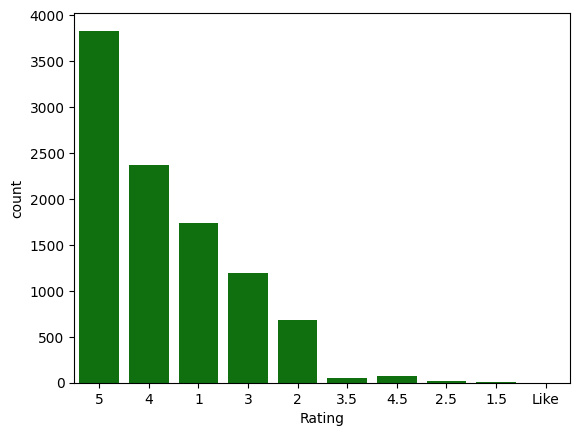

In [4]:
sns.countplot(x='Rating', data=Res, color='green')

In [5]:
Res=Res.drop(['Pictures','7514'],axis=1)

In [6]:
restaurant_ratingCount = (Res.
     groupby(by = ['Restaurant'])['Rating'].
     count().
     reset_index().
     rename(columns = {'Rating': 'totalRatingCount'})
     [['Restaurant', 'totalRatingCount']]
    )
restaurant_ratingCount.head(24)

,Restaurant,totalRatingCount
0,10 Downing Street,100
1,13 Dhaba,100
2,"3B's - Buddies, Bar & Barbecue",100
3,AB's - Absolute Barbecues,100
4,Absolute Sizzlers,100
5,Al Saba Restaurant,100
6,American Wild Wings,77
7,Amul,100
8,Arena Eleven,85
9,Aromas@11SIX,100


In [7]:
rating_with_totalRatingCount = Res.merge(restaurant_ratingCount, left_on = 'Restaurant', right_on = 'Restaurant', how = 'left')


In [8]:
rating_with_totalRatingCount.head(7)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,totalRatingCount
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,100
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,100
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,100
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,100
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,100
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,100
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,100


In [9]:
Res.duplicated().sum()
Res.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset
Res.isnull().sum()
Res.dropna(how='any',inplace=True)

Res['Rating'] = pd.to_numeric(Res['Rating'],errors = 'coerce')

In [10]:
Res.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9955 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  9955 non-null   object 
 1   Reviewer    9955 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9954 non-null   float64
 4   Metadata    9955 non-null   object 
 5   Time        9955 non-null   object 
dtypes: float64(1), object(5)
memory usage: 544.4+ KB


In [11]:
populatity_threshold = rating_with_totalRatingCount['totalRatingCount'].quantile(0.90)

In [12]:
rating_popular_rest = rating_with_totalRatingCount.query('totalRatingCount >= @populatity_threshold')
rating_popular_rest.shape

(9800, 7)

In [13]:
rating_popular_rest['Rating'] = pd.to_numeric(rating_popular_rest['Rating'],errors = 'coerce')

C:\Users\Ankita Singh\AppData\Local\Temp\ipykernel_12492\3626094677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_popular_rest['Rating'] = pd.to_numeric(rating_popular_rest['Rating'],errors = 'coerce')


In [14]:
rating_popular_rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant        9800 non-null   object 
 1   Reviewer          9800 non-null   object 
 2   Review            9793 non-null   object 
 3   Rating            9799 non-null   float64
 4   Metadata          9800 non-null   object 
 5   Time              9800 non-null   object 
 6   totalRatingCount  9800 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 612.5+ KB


In [15]:
rating_popular_rest.isnull().sum()
rating_popular_rest.dropna(how='any',inplace=True)

C:\Users\Ankita Singh\AppData\Local\Temp\ipykernel_12492\867065299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_popular_rest.dropna(how='any',inplace=True)


In [17]:
user_rating = rating_popular_rest.drop_duplicates(['Reviewer', 'Restaurant'])

restaurant_features = user_rating.pivot(index = 'Restaurant', columns = 'Reviewer', values = 'Rating').fillna(0)

In [18]:
restaurant_features_matrix = csr_matrix(restaurant_features.values)

In [19]:
print("Shape of sparse matrix :",restaurant_features_matrix.shape)
print('Amount of Non-Zero occurrences: ', restaurant_features_matrix.nnz)

# Percentage of non-zero values
density = (100.0 * restaurant_features_matrix.nnz / (restaurant_features_matrix.shape[0] * restaurant_features_matrix.shape[1]))
print('Density: {}'.format((density)))

Shape of sparse matrix : (98, 7339)
Amount of Non-Zero occurrences:  9674
Density: 1.3450645280594864


In [31]:
start_time = time.time()
knn_recomm = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn_recomm.fit(restaurant_features_matrix)

randomChoice = np.random.choice(restaurant_features.shape[0])
distances, indices = knn_recomm.kneighbors(restaurant_features.iloc[randomChoice].values.reshape(1, -1), n_neighbors = 15)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for Restaurant {0} :\n'.format(restaurant_features.index[randomChoice]))
    else:
        print('{0}: {1}'.format(i, restaurant_features.index[indices.flatten()[i]]))
end_time=time.time()
print("Execution time is :",time.time()-start_time)

Recommendations for Restaurant 13 Dhaba :

1: Karachi Cafe
2: Sardarji's Chaats & More
3: Faasos
4: Triptify
5: The Foodie Monster Kitchen
6: Gal Punjab Di
7: NorFest - The Dhaba
8: Dine O China
9: Mathura Vilas
10: Frio Bistro
11: Mustang Terrace Lounge
12: Ulavacharu
13: Zing's Northeast Kitchen
14: Behrouz Biryani
Execution time is : 0.014724969863891602
